In [2]:
''''# Advanced Linear Regression: House Price Prediction

This notebook builds and evaluates linear regression models with a focus on:
- Model diagnostics
- Assumption validation
- Regularization
- Generalization using cross-validation
'''
#Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
#Reading sample data that's downloaded
housing_df = pd.read_csv(r"C:\Users\vasup\Downloads\housing_data.csv")
housing_df.head()


,size_sqft,rooms,price
0,1349,3,7745634
1,1158,2,6187450
2,1386,4,8612341
3,1645,3,9045210
4,1102,2,6123988


In [7]:
#Feature/Target split
X=housing_df[["size_sqft","rooms"]]
y=housing_df["price"]


In [8]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
#Training Baseline Linear Regression Model
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:

lr.coef_, lr.intercept_


(array([  4425.1891746 , 652416.32606783]), np.float64(-108234.35891994275))

In [11]:
#Evaluating Baseline LR model
y_pred=lr.predict(X_test)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
rmse,r2
#rmse is considered good here because we have rmse of ~2 lakhs and r2 is ~94 percent which is good explainability

(np.float64(201087.19187928073), 0.9487098649797331)

In [12]:
pd.DataFrame({
    "feature": X.columns,
    "coefficient": lr.coef_
})


,feature,coefficient
0,size_sqft,4425.189175
1,rooms,652416.326068


In [13]:
lr.intercept_

np.float64(-108234.35891994275)

In [14]:
#Residual calculations
residuals=y_test-y_pred
residuals.head()

0     -72960.815824
17    -68496.654523
15   -365926.601788
1    -133517.357407
Name: price, dtype: float64

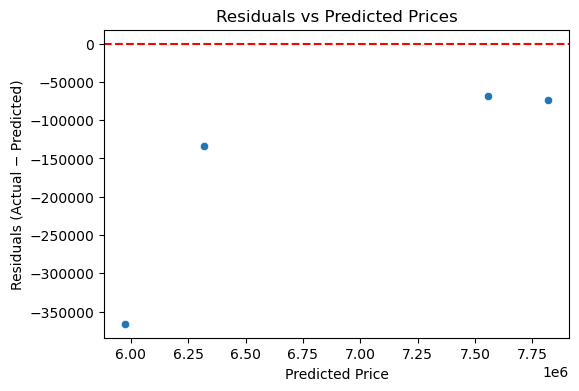

In [15]:
#Residuals vs Predictions
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Actual − Predicted)")
plt.title("Residuals vs Predicted Prices")
plt.show()
#Observed that Residuals are around 0 and no strong patterns

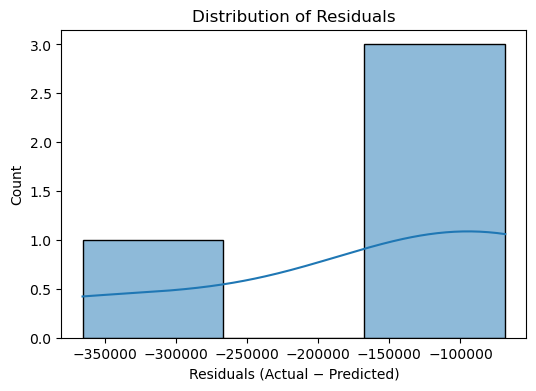

In [16]:
#Residual destribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual − Predicted)")
plt.title("Distribution of Residuals")
plt.show()
#interpret rough normality

In [17]:
#Scale features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]


array([[-0.63182742, -0.80161434],
       [-1.69413744, -1.78821661],
       [ 0.01049958,  0.18498792],
       [ 1.59161217,  0.18498792],
       [ 0.92458029,  1.17159019]])

In [18]:
#Ridge Regression (L2 Regularization)
#Train Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)


Ridge()

In [19]:
#Evaluate Ridge 
ridge_pred = ridge.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_r2 = r2_score(y_test, ridge_pred)

ridge_rmse, ridge_r2


(np.float64(238094.60868686746), 0.9280941628765348)

In [20]:
#Ridge coefficients
pd.DataFrame({
    "feature": X.columns,
    "linear_reg_coef": lr.coef_,
    "ridge_coef": ridge.coef_
})


,feature,linear_reg_coef,ridge_coef
0,size_sqft,4425.189175,836341.826929
1,rooms,652416.326068,669549.925109


In [21]:
#Lasso Regression (L1 Regularization)
#Train Lasso
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.1)

In [22]:
#Lasso coefficients
pd.DataFrame({
    "feature": X.columns,
    "lasso_coefficient": lasso.coef_
})


,feature,lasso_coefficient
0,size_sqft,895610.726031
1,rooms,661275.364336


In [23]:
lasso.intercept_


np.float64(7580658.6875)

In [24]:
#Cross validated rmse
from sklearn.model_selection import cross_val_score

cv_rmse = -cross_val_score(
    LinearRegression(),
    X,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

cv_rmse, cv_rmse.mean()


(array([142805.00236517, 250449.04452267, 130773.89443644, 228058.55660661,
        128328.9269053 ]),
 np.float64(176083.08496723953))